# 项目七 决策树和随机森林

## 项目实训

### 任务一 决策树判断西瓜的好坏

#### 1. 数据读取和处理

In [1]:
import pandas as pd

data = pd.read_csv('melon_data.csv', encoding='gbk')
print('西瓜的数据形态：', data.shape)
print('读取前10条西瓜的数据：')
data.head(10)

西瓜的数据形态： (17, 10)
读取前10条西瓜的数据：


,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜与否
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [2]:
# 将target目标值转变为数字
data.loc[data['好瓜与否'] != '是', '好瓜与否'] = 0
data.loc[data['好瓜与否'] == '是', '好瓜与否'] = 1
data['好瓜与否'] = data['好瓜与否'].astype('int')
print('修改目标值之后的数据集：')
data.head(10)

修改目标值之后的数据集：


,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜与否
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,1
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,1
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,1
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,1
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,0
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,0


In [3]:
# 使用get_dummies将文本数据转化为数值
data_X = pd.get_dummies(data.iloc[:, 1:-1])
print('转换之后的特征值：')
data_X.head()

转换之后的特征值：


,密度,含糖率,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
0,0.697,0.460,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0.774,0.376,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
2,0.634,0.264,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3,0.608,0.318,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
4,0.556,0.215,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0


In [4]:
# 获取特征向量X和分类标签y
X = data_X.values
y = data.iloc[:, -1].values
# 打印数据形态
print('特征形态：{} 标签形态：{}'.format(X.shape, y.shape))

特征形态：(17, 19) 标签形态：(17,)


#### 2. 用决策树建模并做出预测

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=125)
# 建模并预测
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # 建立决策树模型，基于信息熵
dtc.fit(X_train, y_train)  # 训练模型
print('模型得分:{:.2f}'.format(dtc.score(X_test,y_test)))

模型得分:1.00


In [6]:
# 对测试集进行预测
y_pred = dtc.predict(X_test)
print('模型预测的分类结果为：', y_pred)
print('真实分类结果为：', y_test)

模型预测的分类结果为： [0 1 0 1]
真实分类结果为： [0 1 0 1]


#### 3. 决策树的分类过程展示

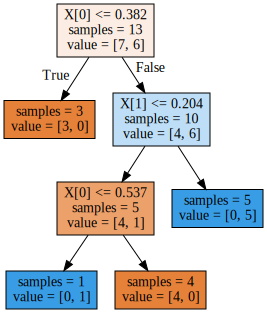

In [7]:
# 导入graphviz工具
import graphviz
# 导入决策树中输出graphviz的接口
from sklearn.tree import export_graphviz

# 建立决策树模型，基于信息熵
dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=30) 
dtc1.fit(X_train, y_train)  # 训练模型
# 导出决策树
dot_data = export_graphviz(dtc1, impurity=False, filled=True)
# 创建图形
graph = graphviz.Source(dot_data)
# 输出PDF文件
graph.render('melon_tree1')
# 显示决策树图形
graph

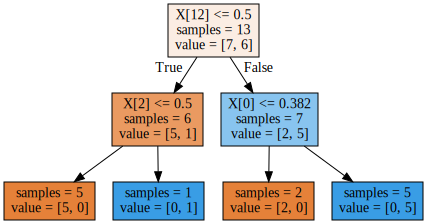

In [8]:
# 建立决策树模型，使用基尼值
dtc2 = DecisionTreeClassifier(criterion='gini', random_state=30)
dtc2.fit(X_train, y_train)  # 训练模型
# 导出决策树
dot_data = export_graphviz(dtc2, impurity=False, filled=True)
# 创建图形
graph = graphviz.Source(dot_data)
# 输出PDF文件
graph.render('melon_tree2')
# 显示决策树图形
graph

### 任务二 决策树和随机森林实现酒分类的对比

#### 1. 数据准备

In [9]:
import numpy as np
import pandas as pd
# 导入数据集获取工具
from sklearn.datasets import load_wine
#用于拆分训练数据和样本数据
from sklearn.model_selection import train_test_split

# 读取酒的数据集
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('训练集数据的维度为：',X_train.shape)
print('训练集标签的维度为：',y_train.shape)
print('测试集数据的维度为：',X_test.shape)
print('测试集标签的维度为：',y_test.shape)

训练集数据的维度为： (133, 13)
训练集标签的维度为： (133,)
测试集数据的维度为： (45, 13)
测试集标签的维度为： (45,)


#### 2、构建与评价分类模型

In [10]:
# 决策树和随机森林模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 对比随机森林分类器vs决策树
clf = DecisionTreeClassifier(max_depth=3)
rfc = RandomForestClassifier(n_estimators=20, random_state=8)
clf = clf.fit(X_train, y_train)
rfc = rfc.fit(X_train, y_train)
score_c = clf.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)

print("决策树模型得分：{:.2f}".format(score_c))
print("随机森林模型得分：{:.2f}".format(score_r))

决策树模型得分：0.93
随机森林模型得分：0.98


#### 3、使用交叉验证评估模型

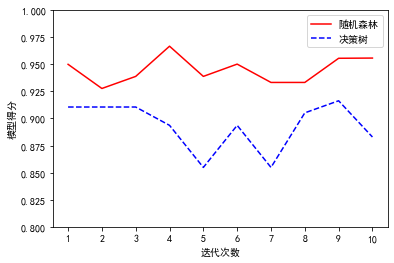

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# 用于交叉验证
from sklearn.model_selection import cross_val_score
plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

#为了观察更稳定的结果，下面进行十组交叉验证    
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=20)
    rfc_s = cross_val_score(rfc, X, y, cv=3).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier(max_depth=3)
    clf_s = cross_val_score(clf, X, y, cv=3).mean()
    clf_l.append(clf_s)

# 绘制交叉验证评分图
plt.figure()
plt.plot(range(1,11), rfc_l, 'r-', label = "随机森林")
plt.plot(range(1,11), clf_l, 'b--', label = "决策树")
plt.xticks(ticks=range(1,11))
plt.ylim((0.8, 1))
plt.xlabel('迭代次数')
plt.ylabel('模型得分')
plt.legend()
plt.show()

## 项目拓展
### 随机森林实战——波士顿房价预测

#### 1. 导入boston房价数据集

In [12]:
# 导入波士顿房价数据集
from sklearn.datasets import load_boston
boston = load_boston()
# 打印数据集中的键
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [13]:
# 查看boston数据集特征数据结构，总共有506个实例，每个实例有13个特征。
print('boston数据集维度：', boston['data'].shape)

boston数据集维度： (506, 13)


In [14]:
# 查看boston数据集特征名称
print('boston数据集特征名称：\n', boston['feature_names'])

boston数据集特征名称：
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
# 查看boston数据集目标变量MEDV：自住房的平均房价。
print('目标变量MEDV：', boston.target[:10])

目标变量MEDV： [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


#### 2. 构建线性回归模型

In [16]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 建立训练数据集和测试数据集
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
reg = LinearRegression()      # 建立线性回归模型对象
reg.fit(X_train, y_train)     # 训练模型
# 打印模型评分
print('线性回归训练集得分：{:.3f}'.format(reg.score(X_train, y_train)))
print('线性回归测试集得分：{:.3f}'.format(reg.score(X_test, y_test)))

线性回归训练集得分：0.744
线性回归测试集得分：0.719


#### 3. 使用随机森林进行建模

In [17]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 建立训练数据集和测试数据集
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
# 使用随机森林回归模型拟合数据
rf_reg = RandomForestRegressor(n_estimators=20, random_state=32)
rf_reg.fit(X_train, y_train)
# 打印模型评分
print('随机森林训练集得分：{:.3f}'.format(rf_reg.score(X_train, y_train)))
print('随机森林测试集得分：{:.3f}'.format(rf_reg.score(X_test, y_test)))

随机森林训练集得分：0.982
随机森林测试集得分：0.823


#### 4. 预测房价并绘制对比图

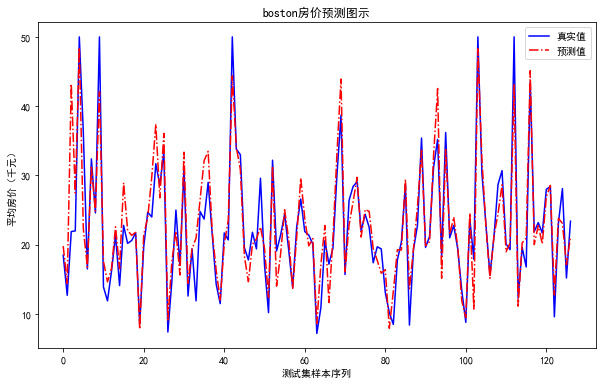

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# 预测测试集结果
y_pred = rf_reg.predict(X_test)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.plot(range(y_test.shape[0]), y_test, c='blue', linestyle='-', label='真实值')
plt.plot(range(y_test.shape[0]), y_pred, c='red', linestyle='-.', label='预测值')
plt.title('boston房价预测图示')
plt.xlabel('测试集样本序列')
plt.ylabel('平均房价（千元）')
plt.legend()
plt.show()